In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Collab DataSets/credit_data.csv")
df.head()

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


In [ ]:
features = df[["income", "age", "loan"]]
labels = df.default.values.reshape(-1,1)
# features = features.values.reshape(-1, 3)
# features

In [ ]:
mms = preprocessing.MinMaxScaler()
features = mms.fit_transform(features)

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2)

In [ ]:
model = GaussianNB()
model.fit(features_train, labels_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predictions = model.predict(features_test)

In [ ]:
print(confusion_matrix(labels_test, predictions))
print(accuracy_score(labels_test, predictions))

[[342   5]
 [ 26  27]]
0.9225


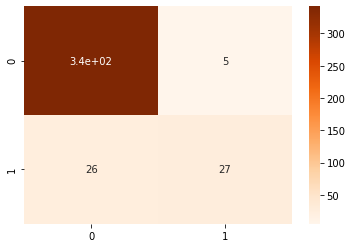

In [ ]:
sns.heatmap(confusion_matrix(labels_test, predictions), annot= True, cmap="Oranges")